In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:

GAME = 'flappy_bird_q_learning'
s_file = open("logs_" + GAME + "/std_out.txt", 'r')

In [19]:
item = s_file.read()

In [20]:
data_split = data.split("\n")

In [29]:
lines = item.strip().split('\n')
data_list = []

current_game = 1  # Initialize the game counter
for line in lines:
    parts = line.split(',')
    frame_part = parts[0].split(' ')
    data_dict = {'FRAME': int(frame_part[1]), 'GAME': current_game}
    data_dict.update(dict(item.split(' ') for item in parts[1:]))
    data_list.append(data_dict)

    if data_dict['REWARD'] == "-1":
        current_game += 1


In [30]:

df = pd.DataFrame(data_list)


In [32]:
numeric_columns = ['EPSILON', 'ACTION', 'REWARD', 'Q_MAX', 'GAME']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [33]:
df

,FRAME,GAME,STATE,EPSILON,ACTION,REWARD,Q_MAX
0,1,1,observe,0.10000,0,0.1,0.999977
1,2,1,observe,0.10000,0,0.1,0.999973
2,3,1,observe,0.10000,0,0.1,0.999882
3,4,1,observe,0.10000,0,0.1,0.999815
4,5,1,observe,0.10000,0,0.1,0.999949
...,...,...,...,...,...,...,...
261957,261958,7182,explore,0.09161,0,0.1,0.311408
261958,261959,7182,explore,0.09161,0,0.1,0.157104
261959,261960,7182,explore,0.09161,0,-1.0,0.000072
261960,261961,7183,explore,0.09161,0,0.1,0.999984


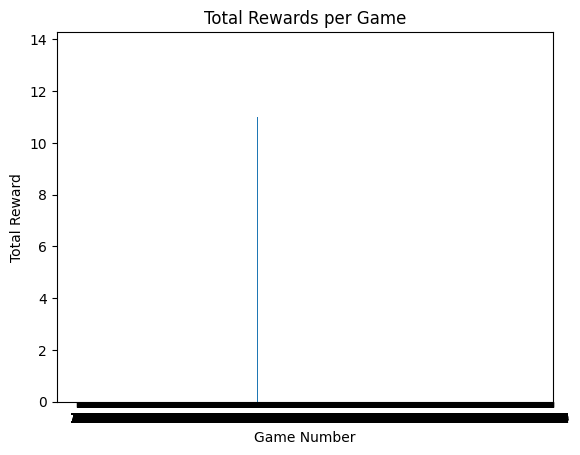

In [40]:
# Calculate total rewards per game
total_rewards_per_game = df.groupby('GAME')['REWARD'].sum()


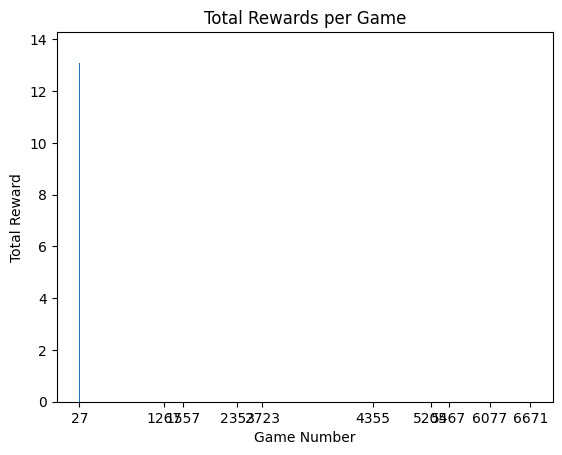

In [41]:

top_10_games = total_rewards_per_game.nlargest(10)
# Plotting with labels
plt.bar(top_10_games.index, top_10_games.values)
plt.xlabel('Game Number')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Game')
plt.xticks(top_10_games.index)
plt.show()

<Axes: xlabel='GAME'>

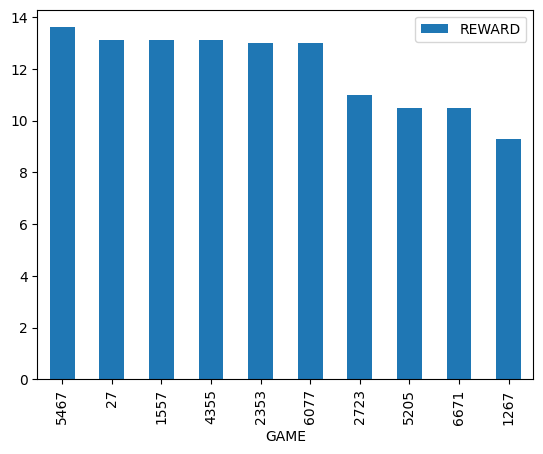

In [52]:
pd.DataFrame(top_10_games).plot(kind='bar')

In [55]:
df.describe()

,FRAME,GAME,EPSILON,ACTION,REWARD,Q_MAX
count,261962.000000,261962.000000,261962.000000,261962.000000,261962.000000,2.619620e+05
mean,130981.500000,3570.976607,0.095965,0.047129,0.070571,7.942454e-01
std,75622.059946,2071.506425,0.002508,0.211915,0.181558,3.210283e-01
min,1.000000,1.000000,0.091610,0.000000,-1.000000,6.104868e-10
25%,65491.250000,1786.000000,0.093791,0.000000,0.100000,6.915870e-01
50%,130981.500000,3556.000000,0.095971,0.000000,0.100000,9.915651e-01
75%,196471.750000,5372.000000,0.098152,0.000000,0.100000,9.997361e-01
max,261962.000000,7183.000000,0.100000,1.000000,1.000000,1.000000e+00


In [56]:
top_10_games

GAME
5467    13.6
27      13.1
1557    13.1
4355    13.1
2353    13.0
6077    13.0
2723    11.0
5205    10.5
6671    10.5
1267     9.3
Name: REWARD, dtype: float64